# Exploratory Data Analysis in Python
## A/B Testing for ShoeFly.com

ShoeFly.com, our favorite online shoe store, is conducting an **A/B Test**. They are testing two different versions of an ad, which have been placed in emails, as well as in banner ads on **Facebook**, **Twitter**, and **Google**. The goal is to determine how the two ads are performing on each of these different platforms across each day of the week.

Your task is to help them analyze the data using **aggregate measures**.

The csv file you use is `ad_clicks.csv`.


**Task**: Examine the first few rows of ad_clicks.

In [1081]:
import pandas as pd

ad_clicks = pd.read_csv('ad_clicks.csv')

combined = pd.concat([ad_clicks.head(5), ad_clicks.tail(5)])
combined

,user_id,utm_source,day,ad_click_timestamp,experimental_group
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B
1649,fe8b5236-78f6-4192-9da6-a76bba67cfe6,twitter,7 - Sunday,NaN,A
1650,fed3db6d-8c92-40e3-a4fb-1fb9d7337eb1,facebook,5 - Friday,NaN,B
1651,ff3a22ff-521c-478c-87ca-7dc7b8f34372,twitter,3 - Wednesday,NaN,B
1652,ff3af0d6-b092-4c4d-9f2e-2bdd8f7c0732,google,1 - Monday,22:57,A
1653,ffdfe7ec-0c74-4623-8d90-d95d80f1ba34,facebook,6 - Saturday,NaN,B


**Task**: Inspect the dataframe. Which columns have NaN values?

**Answer**: Only <code>ad_click_timestamp</code> has NaN values.

In [1083]:
ad_clicks.describe()

,user_id,utm_source,day,ad_click_timestamp,experimental_group
count,1654,1654,1654,565,1654
unique,1654,4,7,464,2
top,008b7c6c-7272-471e-b90e-930d548bd8d7,google,5 - Friday,9:18,A
freq,1,680,256,4,827


In [1084]:
ad_clicks.isna().any().reset_index()

,index,0
0,user_id,False
1,utm_source,False
2,day,False
3,ad_click_timestamp,True
4,experimental_group,False


**Question:**
Your manager wants to know which ad platform is getting you the most views.
How many views (i.e., rows of the table) came from each `utm_source`?

**Answer:**
Google gives us the most views.

In [1086]:
counts = ad_clicks['utm_source'].value_counts().reset_index()
counts

,utm_source,count
0,google,680
1,facebook,504
2,email,255
3,twitter,215


**Task**: If the column <code>ad_click_timestamp</code> is not null, then someone actually clicked on the ad that was displayed. Create a new column called <code>is_click</code>, which is <code>True</code> if <code>ad_click_timestamp</code> is not null and <code>False</code> otherwise.

In [1088]:
ad_clicks['is_click'] = ad_clicks['ad_click_timestamp'].notna()
ad_clicks.head(10)

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
5,013b0072-7b72-40e7-b698-98b4d0c9967f,facebook,1 - Monday,NaN,A,False
6,0153d85b-7660-4c39-92eb-1e1acd023280,google,4 - Thursday,NaN,A,False
7,01555297-d6e6-49ae-aeba-1b196fdbb09f,google,3 - Wednesday,NaN,A,False
8,018cea61-19ea-4119-895b-1a4309ccb148,email,1 - Monday,18:33,A,True
9,01a210c3-fde0-4e6f-8efd-4f0e38730ae6,email,2 - Tuesday,15:21,B,True


**Task**: Check how many unique <code>user_id</code> there are.

**Answer**: 1654. We also noted that there's no NaN values in the column <code>user_id</code>.

In [1090]:
nunique_user_id = ad_clicks['user_id'].nunique()
print(f"The number of unique values in 'user_id' column is: {nunique_user_id}")

ncount_user_id = ad_clicks['user_id'].count()
print(f"The total number of values in 'user_id' column is: {ncount_user_id}")

has_nan = ad_clicks['user_id'].isna().any()
if has_nan:
    print("There are NaN values in the 'user_id' column.")
else:
    print("There are no NaN values in the 'user_id' column.")

The number of unique values in 'user_id' column is: 1654
The total number of values in 'user_id' column is: 1654
There are no NaN values in the 'user_id' column.


**Task**:  
We want to know the **percent of people who clicked on ads** from each `utm_source`.  
Start by grouping by `utm_source` and `is_click`, and counting the number of `user_id`s in each of those groups.  
Save your answer to the variable `clicks_by_source`.

In [1092]:
views_by_source = ad_clicks.groupby('utm_source')['user_id'].count().reset_index()
views_by_source

,utm_source,user_id
0,email,255
1,facebook,504
2,google,680
3,twitter,215


In [1093]:
views_by_source = views_by_source.rename(columns={'user_id': 'no_of_views'})
views_by_source

,utm_source,no_of_views
0,email,255
1,facebook,504
2,google,680
3,twitter,215


In [1094]:
clicks_by_source = ad_clicks.groupby(['utm_source', 'is_click'])['user_id'].count().reset_index().rename(columns={'user_id': 'no_of_clicks'})
clicks_by_source

,utm_source,is_click,no_of_clicks
0,email,False,175
1,email,True,80
2,facebook,False,324
3,facebook,True,180
4,google,False,441
5,google,True,239
6,twitter,False,149
7,twitter,True,66


**Note**: In above table, <code>False</code> means no clicks!

In [1096]:
total_clicks_and_nonclicks = clicks_by_source['no_of_clicks'].sum()

# Add new column percent_of_clicks
clicks_by_source['percent_of_clicks'] = clicks_by_source['no_of_clicks']/total_clicks_and_nonclicks*100

clicks_by_source

,utm_source,is_click,no_of_clicks,percent_of_clicks
0,email,False,175,10.580411
1,email,True,80,4.836759
2,facebook,False,324,19.588875
3,facebook,True,180,10.882709
4,google,False,441,26.662636
5,google,True,239,14.449819
6,twitter,False,149,9.008464
7,twitter,True,66,3.990326


**Task**:  
Now let’s pivot the data so that the columns are `is_click` (either `True` or `False`), the index is `utm_source`, and the values are `user_id`.  

Save your results to the variable `clicks_pivot`.

In [1098]:
clicks_pivot = clicks_by_source.pivot(
    index='utm_source',
    columns='is_click',
    values=['no_of_clicks','percent_of_clicks']
).reset_index()

clicks_pivot

utm_source no_of_clicks        percent_of_clicks           
is_click                   False   True             False       True
0             email        175.0   80.0         10.580411   4.836759
1          facebook        324.0  180.0         19.588875  10.882709
2            google        441.0  239.0         26.662636  14.449819
3           twitter        149.0   66.0          9.008464   3.990326

In [1099]:
# Check column names
clicks_pivot.columns

MultiIndex([(       'utm_source',    ''),
            (     'no_of_clicks', False),
            (     'no_of_clicks',  True),
            ('percent_of_clicks', False),
            ('percent_of_clicks',  True)],
           names=[None, 'is_click'])

In [1100]:
# Flatten and rename name of columns
clicks_pivot.columns = clicks_pivot.columns = ['utm_source', 'no_of_non_clicks', 'no_of_clicks', '%_of_non_clicks', '%_of_clicks']

clicks_pivot

,utm_source,no_of_non_clicks,no_of_clicks,%_of_non_clicks,%_of_clicks
0,email,175.0,80.0,10.580411,4.836759
1,facebook,324.0,180.0,19.588875,10.882709
2,google,441.0,239.0,26.662636,14.449819
3,twitter,149.0,66.0,9.008464,3.990326


**Task**: Create a new column in `clicks_pivot` called `click_rate` which is equal to the percent of users who clicked on the ad from each `utm_source`.

Was there a difference in click rates for each source?

**Answer**: `facebook` had the highest click rate, while `twitter` had the lowest click rate.


In [1102]:
clicks_pivot['click_rate_%'] = (
    clicks_pivot['no_of_clicks'] / 
    (clicks_pivot['no_of_clicks'] + clicks_pivot['no_of_non_clicks']) * 
    100
)

# Sort rows by ascending click rate
clicks_pivot = clicks_pivot.sort_values(by='click_rate_%', ascending=True).reset_index(drop=True)

clicks_pivot

,utm_source,no_of_non_clicks,no_of_clicks,%_of_non_clicks,%_of_clicks,click_rate_%
0,twitter,149.0,66.0,9.008464,3.990326,30.697674
1,email,175.0,80.0,10.580411,4.836759,31.372549
2,google,441.0,239.0,26.662636,14.449819,35.147059
3,facebook,324.0,180.0,19.588875,10.882709,35.714286


**Task**: The column experimental_group tells us whether the user was shown Ad A or Ad B.

Were approximately the same number of people shown both ads?

**Answer**: Exactly the same number of people were shown both ads.


In [1104]:
ad_clicks['experimental_group'].value_counts()

experimental_group
A    827
B    827
Name: count, dtype: int64

**Task**: Using the column is_click that we defined earlier, check to see if a greater percentage of users clicked on Ad A or Ad B.

**Answer**: 18.7% of users clicked on Ad A while 15.4% of users clicked on Ad B.

In [1106]:
ad_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False


In [1107]:
clicks_by_ad = ad_clicks.groupby(['experimental_group', 'is_click'])['user_id'].count().reset_index()
clicks_by_ad

,experimental_group,is_click,user_id
0,A,False,517
1,A,True,310
2,B,False,572
3,B,True,255


In [1108]:
clicks_by_ad_pivot = clicks_by_ad.pivot(
    index='experimental_group',
    columns='is_click',
    values='user_id'
).reset_index()

clicks_by_ad_pivot.columns.name = None

clicks_by_ad_pivot

,experimental_group,False,True
0,A,517,310
1,B,572,255


In [1109]:
# Change boolean column names to strings
clicks_by_ad_pivot = clicks_by_ad_pivot.rename(columns={True: 'True', False: 'False'})

In [1110]:
clicks_by_ad_pivot['%_of_non_clicks'] = (
    clicks_by_ad_pivot['False']/
    (clicks_by_ad_pivot['False'].sum() + clicks_by_ad_pivot['True'].sum())*
    100
)


clicks_by_ad_pivot['%_of_clicks'] = (
    clicks_by_ad_pivot['True']/
    (clicks_by_ad_pivot['False'].sum() + clicks_by_ad_pivot['True'].sum())*
    100
)


clicks_by_ad_pivot

,experimental_group,False,True,%_of_non_clicks,%_of_clicks
0,A,517,310,31.257557,18.742443
1,B,572,255,34.582830,15.417170


**Task**: The Product Manager for the A/B test thinks that the clicks might have changed by day of the week.

Start by creating two DataFrames: `a_clicks` and `b_clicks`, which contain only the results for A group and B group, respectively.


In [1112]:
a_clicks = ad_clicks[ad_clicks['experimental_group'] == 'A']
b_clicks = ad_clicks[ad_clicks['experimental_group'] == 'B']

In [1113]:
a_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
0,008b7c6c-7272-471e-b90e-930d548bd8d7,google,6 - Saturday,7:18,A,True
2,00f5d532-ed58-4570-b6d2-768df5f41aed,twitter,2 - Tuesday,NaN,A,False
5,013b0072-7b72-40e7-b698-98b4d0c9967f,facebook,1 - Monday,NaN,A,False
6,0153d85b-7660-4c39-92eb-1e1acd023280,google,4 - Thursday,NaN,A,False
7,01555297-d6e6-49ae-aeba-1b196fdbb09f,google,3 - Wednesday,NaN,A,False


In [1114]:
b_clicks.head()

,user_id,utm_source,day,ad_click_timestamp,experimental_group,is_click
1,009abb94-5e14-4b6c-bb1c-4f4df7aa7557,facebook,7 - Sunday,NaN,B,False
3,011adc64-0f44-4fd9-a0bb-f1506d2ad439,google,2 - Tuesday,NaN,B,False
4,012137e6-7ae7-4649-af68-205b4702169c,facebook,7 - Sunday,NaN,B,False
9,01a210c3-fde0-4e6f-8efd-4f0e38730ae6,email,2 - Tuesday,15:21,B,True
10,01adb2e7-f711-4ae4-a7c6-29f48457eea1,google,3 - Wednesday,NaN,B,False


**Task**: For each group (a_clicks and b_clicks), calculate the percent of users who clicked on the ad by day.


In [1116]:
a_clicks_by_day = a_clicks.groupby(['day','is_click'])['user_id'].count().reset_index()

# Only keep rows that shows clicks
a_clicks_by_day = a_clicks_by_day[a_clicks_by_day['is_click'] == True]
a_clicks_by_day

,day,is_click,user_id
1,1 - Monday,True,43
3,2 - Tuesday,True,43
5,3 - Wednesday,True,38
7,4 - Thursday,True,47
9,5 - Friday,True,51
11,6 - Saturday,True,45
13,7 - Sunday,True,43


In [1117]:
# Add column that shows % of clicks (no. of clicks/ (total no. of views for a and b) *100)
a_clicks_by_day['%_of_clicks'] = a_clicks_by_day['user_id']/len(ad_clicks)*100

a_clicks_by_day

,day,is_click,user_id,%_of_clicks
1,1 - Monday,True,43,2.599758
3,2 - Tuesday,True,43,2.599758
5,3 - Wednesday,True,38,2.297461
7,4 - Thursday,True,47,2.841596
9,5 - Friday,True,51,3.083434
11,6 - Saturday,True,45,2.720677
13,7 - Sunday,True,43,2.599758


In [1118]:
b_clicks_by_day = b_clicks.groupby(['day','is_click'])['user_id'].count().reset_index()

# Only keep rows that shows clicks
b_clicks_by_day = b_clicks_by_day[b_clicks_by_day['is_click'] == True]


# Add column that shows % of clicks (no. of clicks/ (total no. of views for a and b) *100)
b_clicks_by_day['%_of_clicks'] = b_clicks_by_day['user_id']/len(ad_clicks)*100

b_clicks_by_day

,day,is_click,user_id,%_of_clicks
1,1 - Monday,True,32,1.934704
3,2 - Tuesday,True,45,2.720677
5,3 - Wednesday,True,35,2.116082
7,4 - Thursday,True,29,1.753325
9,5 - Friday,True,38,2.297461
11,6 - Saturday,True,42,2.539299
13,7 - Sunday,True,34,2.055623


**Task**: Create graphs for how `%_of_clicks` varies over the week for both Ad A and B.

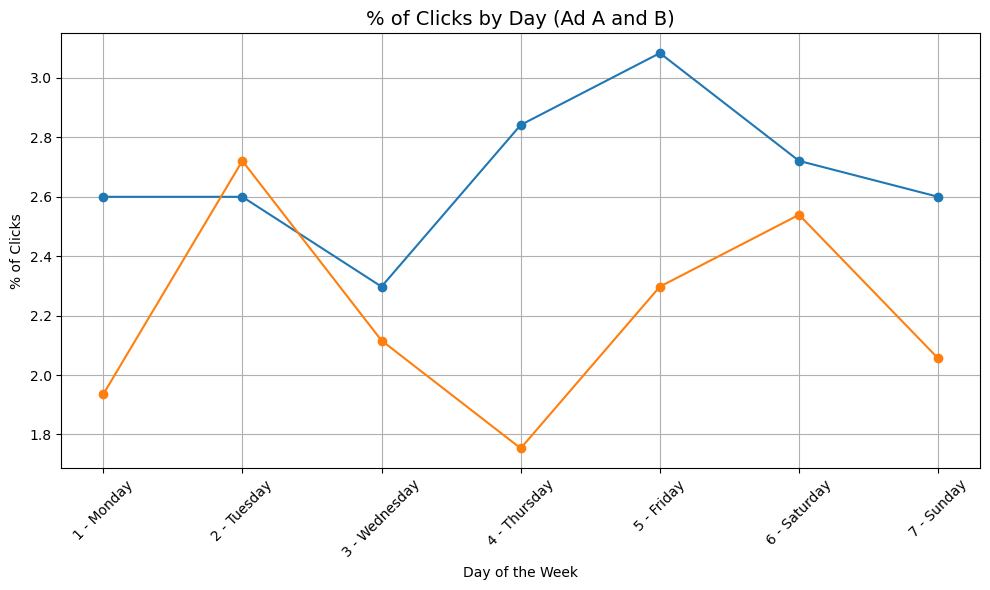

In [1158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(a_clicks_by_day['day'], a_clicks_by_day['%_of_clicks'], marker='o', linestyle='-')
plt.plot(b_clicks_by_day['day'], b_clicks_by_day['%_of_clicks'], marker='o', linestyle='-')
plt.title('% of Clicks by Day (Ad A and B)', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('% of Clicks')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Question**: Compare the results for A and B. What happened over the course of the week?

Do you recommend that your company use Ad A or Ad B?

**Answer**: Use Ad A as % of clicks every day (except Tuesday) is higher than Ad B. But maybe use Ad B on Tuesday as that is the only day where more users clicked on B.